# Calcium Imaging Data Exploration for Dandiset 001174

**NOTE: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified by a human expert. Use with caution.**

This notebook helps you get started visualizing and analyzing publicly available calcium imaging data recorded in macaques.

It avoids drawing scientific conclusions but demonstrates loading and exploring dataset contents.

## About Dandiset 001174

**Title**: Calcium imaging in SMA and M1 of macaques  

**Description**:  
The study of motor cortices in non-human primates is relevant to understanding human motor control. Using miniature microscopes and calcium indicators (GCaMP6f), activity was recorded from projection neurons in the supplementary and primary motor cortex during spontaneous and task behavior, revealing network dynamics.  

**Contributors**: Galvan, Martel, Pittard, Devergnas, Risk, Nassi, Yu, Downer, Wichmann, Aligning Science Across Parkinson's, NIH ORIP  

**Citation**:  
Galvan et al. (2025). Calcium imaging in SMA and M1 of macaques (Version draft). DANDI Archive. https://dandiarchive.org/dandiset/001174/draft  

**License**: CC-BY-4.0  

**Keywords**: one-photon calcium imaging, non-human primates, microendoscope, reaching task, GCaMP, GRIN lens

## Get list of files in the Dandiset using DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())
print(f"Number of assets: {len(assets)}")
for asset in assets[:10]:
    print(asset.path)

Number of assets: 45
sub-V/sub-V_ses-20230309T110929_ophys.nwb
sub-Q/sub-Q_ophys.nwb
sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
sub-Q/sub-Q_ses-20221028T121142_ophys.nwb
sub-Q/sub-Q_ses-20221201T132256_ophys.nwb
sub-Q/sub-Q_ses-20221202T122907_ophys.nwb
sub-Q/sub-Q_ses-20221206T121002_ophys.nwb
sub-Q/sub-Q_ses-20220915T133954_ophys.nwb
sub-Q/sub-Q_ses-20221201T134628_ophys.nwb


## Load the example NWB file (sub-Q/sub-Q_ophys.nwb)

Here we use `remfile` to stream data remotely without downloading the full file.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"

file_obj = remfile.File(nwb_url)
f = h5py.File(file_obj, 'r')
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwbfile = io.read()

print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id}")
print(f"Species: {nwbfile.subject.species}")
print(f"Age: {nwbfile.subject.age}")
print(f"Sex: {nwbfile.subject.sex}")

Session description: Calcium imaging in SMA during the spontaneous condition
Session start time: 2022-09-15 13:16:33.129000+00:00
Subject ID: Q
Species: Macaca mulatta
Age: P5Y
Sex: F


## Explore imaging frame data (OnePhotonSeries)

The raw imaging video is stored as a 3D array (time, height, width). We will visualize a few frames.

OnePhotonSeries data shape: (6041, 320, 200)


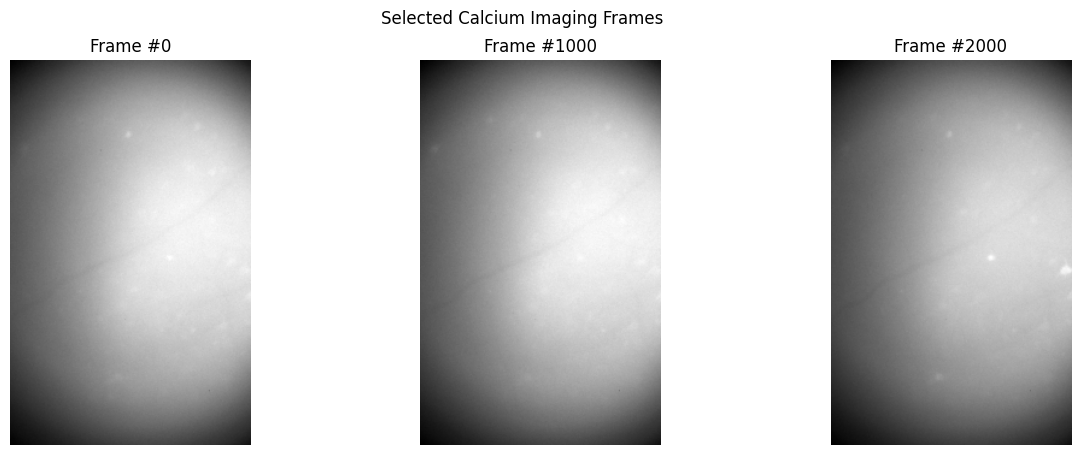

In [3]:
import matplotlib.pyplot as plt

onephoton = nwbfile.acquisition["OnePhotonSeries"]
print("OnePhotonSeries data shape:", onephoton.data.shape)

frame_idxs = [0, 1000, 2000]
fig, axs = plt.subplots(1, len(frame_idxs), figsize=(15, 5))

for idx, ax in zip(frame_idxs, axs):
    # Load one frame as numpy array slice
    data = onephoton.data[idx, :, :]
    ax.imshow(data, cmap='gray')
    ax.set_title(f"Frame #{idx}")
    ax.axis('off')

plt.suptitle("Selected Calcium Imaging Frames")
plt.show()

## Explore ROI segmentation masks

The PlaneSegmentation table contains cell footprint masks. We'll plot a combined mask heatmap to visualize ROI coverage.

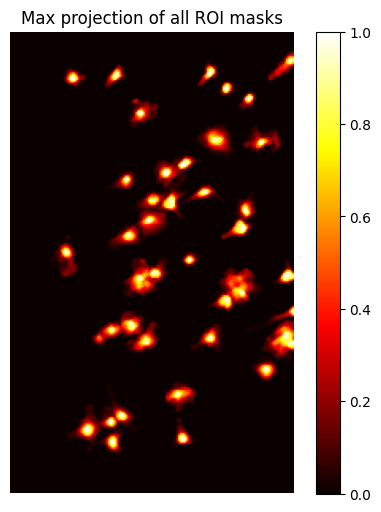

In [4]:
import numpy as np

plane_seg = nwbfile.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
roi_masks = [plane_seg['image_mask'][i] for i in range(len(plane_seg['image_mask']))]

combined_mask = np.max(roi_masks, axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(combined_mask, cmap='hot')
plt.colorbar()
plt.title("Max projection of all ROI masks")
plt.axis('off')
plt.show()

## Plot fluorescence traces for selected ROIs

Extract ΔF/F traces for a subset of cells and plot them across time.

Fluorescence data shape (frames x ROIs): (6041, 40)


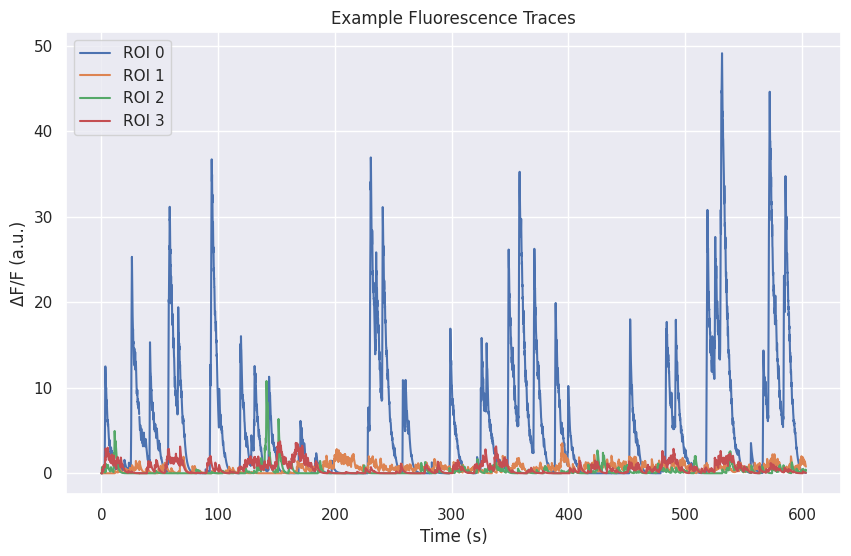

In [5]:
import seaborn as sns
sns.set_theme()

roi_response = nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']
data = roi_response.data
print("Fluorescence data shape (frames x ROIs):", data.shape)

roi_indices = [0, 1, 2, 3]  # Example ROI indices
timepoints = np.arange(data.shape[0]) / roi_response.rate

plt.figure(figsize=(10, 6))
for idx in roi_indices:
    plt.plot(timepoints, data[:, idx], label=f'ROI {idx}')

plt.xlabel('Time (s)')
plt.ylabel('ΔF/F (a.u.)')
plt.legend()
plt.title("Example Fluorescence Traces")
plt.show()

## Plot event amplitudes for selected ROIs

Extract inferred event amplitudes for comparison.

Event amplitude data shape: (6041, 40)


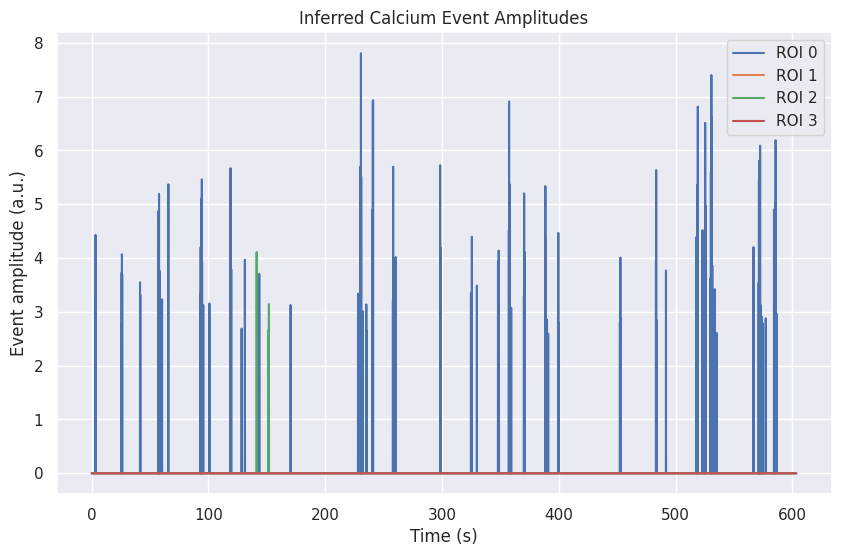

In [6]:
event_amplitude = nwbfile.processing['ophys'].data_interfaces['EventAmplitude']
event_data = event_amplitude.data
print("Event amplitude data shape:", event_data.shape)

plt.figure(figsize=(10, 6))
for idx in roi_indices:
    plt.plot(timepoints, event_data[:, idx], label=f'ROI {idx}')

plt.xlabel('Time (s)')
plt.ylabel('Event amplitude (a.u.)')
plt.legend()
plt.title("Inferred Calcium Event Amplitudes")
plt.show()

# Summary

This notebook demonstrates how to programmatically access, visualize, and begin exploring a DANDI calcium imaging dataset without downloading full files.

Researchers can adapt this workflow to their specific analyses or select other sessions or ROIs.

---

**Disclaimer:** This notebook was automatically generated and should be reviewed and validated before use in scientific work.